In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

In [3]:
#Load the data
data=pd.read_csv('AIDS_Classification.csv')
data

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1


In [4]:
#Seperate the features and Label
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
print("Features: ")
print(X)
print("Label: ")
print(y)

Features: 
      time  trt  age      wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0      948    2   48   89.8128     0     0      0     100       0    0  ...   
1     1002    3   61   49.4424     0     0      0      90       0    1  ...   
2      961    3   45   88.4520     0     1      1      90       0    1  ...   
3     1166    3   47   85.2768     0     1      0     100       0    1  ...   
4     1090    0   43   66.6792     0     1      0     100       0    1  ...   
...    ...  ...  ...       ...   ...   ...    ...     ...     ...  ...  ...   
2134  1091    3   21   53.2980     1     0      0     100       0    1  ...   
2135   395    0   17  102.9672     1     0      0     100       0    1  ...   
2136  1104    2   53   69.8544     1     1      0      90       0    1  ...   
2137   465    0   14   60.0000     1     0      0     100       0    0  ...   
2138  1045    3   45   77.3000     1     0      0     100       0    0  ...   

      gender  str2  strat  symptom  trea

In [5]:
#remove unnecessary columns for better result
columns_to_remove = ['time', 'strat']
df_cleaned = X.drop(columns=columns_to_remove)
df_cleaned

,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,2,48,89.8128,0,0,0,100,0,0,0,0,0,0,0,1,0,422,477,566,324
1,3,61,49.4424,0,0,0,90,0,1,895,0,0,1,0,1,0,162,218,392,564
2,3,45,88.4520,0,1,1,90,0,1,707,0,1,1,0,1,1,326,274,2063,1893
3,3,47,85.2768,0,1,0,100,0,1,1399,0,1,1,0,1,0,287,394,1590,966
4,0,43,66.6792,0,1,0,100,0,1,1352,0,1,1,0,0,0,504,353,870,782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,3,21,53.2980,1,0,0,100,0,1,842,0,1,1,0,1,1,152,109,561,720
2135,0,17,102.9672,1,0,0,100,0,1,417,1,1,1,0,0,1,373,218,1759,1030
2136,2,53,69.8544,1,1,0,90,0,1,753,1,1,1,0,1,0,419,364,1391,1041
2137,0,14,60.0000,1,0,0,100,0,0,0,0,1,0,0,0,0,166,169,999,1838


In [6]:
#Scale some columns to remove biasness in Dataset
scaler = MinMaxScaler()
columns_to_normalize = ['age', 'wtkg', 'karnof', 'preanti', 'z30', 'cd40', 'cd420', 'cd80', 'cd820']
df_cleaned[columns_to_normalize] = scaler.fit_transform(df_cleaned[columns_to_normalize])
df_cleaned

,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,2,0.620690,0.456128,0,0,0,1.000000,0,0.0,0.000000,0,0,0,0,1,0,0.351960,0.400000,0.105814,0.033835
1,3,0.844828,0.143032,0,0,0,0.666667,0,1.0,0.313925,0,0,1,0,1,0,0.135113,0.157944,0.070811,0.074437
2,3,0.568966,0.445574,0,1,1,0.666667,0,1.0,0.247983,0,1,1,0,1,1,0.271893,0.210280,0.406960,0.299273
3,3,0.603448,0.420948,0,1,0,1.000000,0,1.0,0.490705,0,1,1,0,1,0,0.239366,0.322430,0.311808,0.142446
4,0,0.534483,0.276713,0,1,0,1.000000,0,1.0,0.474220,0,1,1,0,0,0,0.420350,0.284112,0.166968,0.111318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,3,0.155172,0.172934,1,0,0,1.000000,0,1.0,0.295335,0,1,1,0,1,1,0.126772,0.056075,0.104808,0.100829
2135,0,0.086207,0.558148,1,0,0,1.000000,0,1.0,0.146264,1,1,1,0,0,1,0.311093,0.157944,0.345806,0.153274
2136,2,0.706897,0.301339,1,1,0,0.666667,0,1.0,0.264118,1,1,1,0,1,0,0.349458,0.294393,0.271776,0.155134
2137,0,0.034483,0.224912,1,0,0,1.000000,0,0.0,0.000000,0,1,0,0,0,0,0.138449,0.112150,0.192919,0.289968


In [7]:
#Remove Duplicate, if exist
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned

,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,2,0.620690,0.456128,0,0,0,1.000000,0,0.0,0.000000,0,0,0,0,1,0,0.351960,0.400000,0.105814,0.033835
1,3,0.844828,0.143032,0,0,0,0.666667,0,1.0,0.313925,0,0,1,0,1,0,0.135113,0.157944,0.070811,0.074437
2,3,0.568966,0.445574,0,1,1,0.666667,0,1.0,0.247983,0,1,1,0,1,1,0.271893,0.210280,0.406960,0.299273
3,3,0.603448,0.420948,0,1,0,1.000000,0,1.0,0.490705,0,1,1,0,1,0,0.239366,0.322430,0.311808,0.142446
4,0,0.534483,0.276713,0,1,0,1.000000,0,1.0,0.474220,0,1,1,0,0,0,0.420350,0.284112,0.166968,0.111318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,3,0.155172,0.172934,1,0,0,1.000000,0,1.0,0.295335,0,1,1,0,1,1,0.126772,0.056075,0.104808,0.100829
2135,0,0.086207,0.558148,1,0,0,1.000000,0,1.0,0.146264,1,1,1,0,0,1,0.311093,0.157944,0.345806,0.153274
2136,2,0.706897,0.301339,1,1,0,0.666667,0,1.0,0.264118,1,1,1,0,1,0,0.349458,0.294393,0.271776,0.155134
2137,0,0.034483,0.224912,1,0,0,1.000000,0,0.0,0.000000,0,1,0,0,0,0,0.138449,0.112150,0.192919,0.289968


In [8]:
#Check Null values in all columns
df_cleaned.isnull().sum()

trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
preanti    0
race       0
gender     0
str2       0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
dtype: int64

In [9]:
#To get all the info of DataFrame
df_cleaned.describe()

,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,symptom,treat,offtrt,cd40,cd420,cd80,cd820
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,1.520804,0.400832,0.342218,0.084151,0.661057,0.131370,0.848216,0.021973,0.550257,0.132997,0.288453,0.827957,0.585788,0.172978,0.751286,0.362786,0.292328,0.301222,0.190430,0.137264
std,1.127890,0.150156,0.102864,0.277680,0.473461,0.337883,0.196699,0.146629,0.497584,0.164384,0.453149,0.377506,0.492701,0.378317,0.432369,0.480916,0.098894,0.135173,0.096600,0.075279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.293103,0.276713,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.219766,0.205607,0.123516,0.085857
50%,2.000000,0.379310,0.336518,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.049807,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.283570,0.284112,0.171595,0.125359
75%,3.000000,0.482759,0.399841,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.259383,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.352794,0.384112,0.234762,0.172983
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#to get the shape of the DataFrame
df_cleaned.shape

(2139, 20)

In [11]:
#to get the index of the DataFrame
df_cleaned.index

RangeIndex(start=0, stop=2139, step=1)

In [12]:
#to get the column names of the DataFrame
df_cleaned.columns

Index(['trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior',
       'z30', 'preanti', 'race', 'gender', 'str2', 'symptom', 'treat',
       'offtrt', 'cd40', 'cd420', 'cd80', 'cd820'],
      dtype='object')

In [13]:
#to get the types of columns of the DataFrame
df_cleaned.dtypes

trt          int64
age        float64
wtkg       float64
hemo         int64
homo         int64
drugs        int64
karnof     float64
oprior       int64
z30        float64
preanti    float64
race         int64
gender       int64
str2         int64
symptom      int64
treat        int64
offtrt       int64
cd40       float64
cd420      float64
cd80       float64
cd820      float64
dtype: object

In [14]:
#to calculate the central tendency
central_tendency = {
    'mean': df_cleaned.mean(),
    'median': df_cleaned.median(),
    'mode': df_cleaned.mode().iloc[0] #to select the first mode
}
central_tendency

{'mean': trt        1.520804
 age        0.400832
 wtkg       0.342218
 hemo       0.084151
 homo       0.661057
 drugs      0.131370
 karnof     0.848216
 oprior     0.021973
 z30        0.550257
 preanti    0.132997
 race       0.288453
 gender     0.827957
 str2       0.585788
 symptom    0.172978
 treat      0.751286
 offtrt     0.362786
 cd40       0.292328
 cd420      0.301222
 cd80       0.190430
 cd820      0.137264
 dtype: float64,
 'median': trt        2.000000
 age        0.379310
 wtkg       0.336518
 hemo       0.000000
 homo       1.000000
 drugs      0.000000
 karnof     1.000000
 oprior     0.000000
 z30        1.000000
 preanti    0.049807
 race       0.000000
 gender     1.000000
 str2       1.000000
 symptom    0.000000
 treat      1.000000
 offtrt     0.000000
 cd40       0.283570
 cd420      0.284112
 cd80       0.171595
 cd820      0.125359
 dtype: float64,
 'mode': trt        3.000000
 age        0.362069
 wtkg       0.308374
 hemo       0.000000
 homo       1.00

In [15]:
#to calculate dispersion
dispersion = {
    'std_dev': df_cleaned.std(),
    'variance': df_cleaned.var(),
    'range': df_cleaned.max() - df_cleaned.min()
}
dispersion

{'std_dev': trt        1.127890
 age        0.150156
 wtkg       0.102864
 hemo       0.277680
 homo       0.473461
 drugs      0.337883
 karnof     0.196699
 oprior     0.146629
 z30        0.497584
 preanti    0.164384
 race       0.453149
 gender     0.377506
 str2       0.492701
 symptom    0.378317
 treat      0.432369
 offtrt     0.480916
 cd40       0.098894
 cd420      0.135173
 cd80       0.096600
 cd820      0.075279
 dtype: float64,
 'variance': trt        1.272135
 age        0.022547
 wtkg       0.010581
 hemo       0.077106
 homo       0.224166
 drugs      0.114165
 karnof     0.038691
 oprior     0.021500
 z30        0.247590
 preanti    0.027022
 race       0.205344
 gender     0.142511
 str2       0.242754
 symptom    0.143124
 treat      0.186943
 offtrt     0.231281
 cd40       0.009780
 cd420      0.018272
 cd80       0.009332
 cd820      0.005667
 dtype: float64,
 'range': trt        3.0
 age        1.0
 wtkg       1.0
 hemo       1.0
 homo       1.0
 drugs      1.

In [16]:
# Correlation analysis
correlation_matrix = df_cleaned.corr()
correlation_matrix

,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,symptom,treat,offtrt,cd40,cd420,cd80,cd820
trt,1.000000,-0.001931,-0.031685,0.012329,0.025035,0.005712,-0.014573,-0.026805,-0.001656,0.006710,0.017080,0.022691,-0.003003,-0.000765,0.775990,-0.043239,-0.012770,0.064448,-0.015665,-0.004595
age,-0.001931,1.000000,0.132858,-0.231257,0.158917,0.077446,-0.100041,0.056161,0.061178,0.113220,-0.097678,0.048705,0.068230,0.032814,0.001499,-0.057695,-0.040302,-0.044294,0.046874,0.037458
wtkg,-0.031685,0.132858,1.000000,-0.075791,0.155909,0.002343,0.034271,0.009607,-0.073841,-0.079292,-0.081452,0.240013,-0.078885,0.003942,-0.040638,-0.003159,0.036401,0.020980,0.090075,0.085447
hemo,0.012329,-0.231257,-0.075791,1.000000,-0.391307,-0.092957,0.068403,0.034978,0.111554,0.113892,-0.070333,0.115867,0.124983,-0.076296,0.010786,0.005949,-0.022533,-0.065838,-0.037273,-0.058392
homo,0.025035,0.158917,0.155909,-0.391307,1.000000,-0.206876,-0.042072,0.019743,-0.049760,0.014132,-0.307108,0.607820,-0.036700,0.118575,0.024407,-0.045151,0.000511,0.019915,0.086028,0.082284
drugs,0.005712,0.077446,0.002343,-0.092957,-0.206876,1.000000,-0.084558,-0.029968,0.014961,-0.029981,0.082311,-0.141748,0.001106,0.027052,0.022055,0.098031,-0.003360,0.013109,0.014900,0.025728
karnof,-0.014573,-0.100041,0.034271,0.068403,-0.042072,-0.084558,1.000000,-0.057291,-0.074947,-0.023189,0.026155,-0.011695,-0.085975,-0.107940,0.001379,-0.103251,0.077730,0.098463,-0.008567,-0.003981
oprior,-0.026805,0.056161,0.009607,0.034978,0.019743,-0.029968,-0.057291,1.000000,-0.037580,0.067082,-0.003923,0.042976,0.126040,0.024199,-0.031801,0.019561,-0.059199,-0.109643,-0.019247,-0.036577
z30,-0.001656,0.061178,-0.073841,0.111554,-0.049760,0.014961,-0.074947,-0.037580,1.000000,0.655054,-0.073658,-0.036119,0.903417,0.020883,0.003776,-0.029318,-0.121282,-0.200149,0.029346,0.018454
preanti,0.006710,0.113220,-0.079292,0.113892,0.014132,-0.029981,-0.023189,0.067082,0.655054,1.000000,-0.124939,0.032099,0.680354,0.012304,0.005682,-0.042379,-0.067495,-0.132213,0.037500,0.023221


In [17]:
# Grouping by treatment group ('trt') and calculating mean for each group
grouped_by_treatment = data.groupby('trt').mean()
grouped_by_treatment

,time,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
trt,,,,,,,,,,,,,,,,,,,,,
0,801.236842,35.225564,76.061859,0.078947,0.640977,0.118421,95.432331,0.030075,0.546992,374.548872,...,0.580827,1.981203,0.167293,0.0,0.406015,353.204887,336.139098,987.250000,928.214286,0.340226
1,916.239464,35.229885,74.870585,0.082375,0.662835,0.139847,95.536398,0.017241,0.551724,379.111111,...,0.591954,1.980843,0.183908,1.0,0.333333,348.724138,403.172414,1004.316092,967.975096,0.197318
2,905.751908,35.431298,74.714198,0.087786,0.664122,0.145038,95.706107,0.024809,0.561069,378.925573,...,0.595420,1.988550,0.169847,1.0,0.385496,352.774809,372.038168,984.104962,901.612595,0.208015
3,893.479501,35.115865,74.858191,0.087344,0.675579,0.122995,95.133690,0.016043,0.541889,383.857398,...,0.575758,1.969697,0.171123,1.0,0.327986,347.467023,374.324421,971.934046,943.347594,0.228164


In [18]:
# Grouping by gender and age group
df_cleaned['age_group'] = pd.cut(data['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
grouped_by_gender_age = df_cleaned.groupby(['gender', 'age_group'],observed=True).mean()
grouped_by_gender_age

trt       age      wtkg      hemo      homo     drugs  \
gender age_group                                                               
0      0-20       1.111111  0.118774  0.230822  0.222222  0.111111  0.000000   
       21-30      1.318966  0.251189  0.293112  0.017241  0.043103  0.129310   
       31-40      1.540230  0.400515  0.290958  0.000000  0.017241  0.321839   
       41-50      1.509434  0.558556  0.291421  0.018868  0.037736  0.301887   
       51-60      1.571429  0.741379  0.246555  0.000000  0.000000  0.000000   
       61-70      3.000000  0.862069  0.203716  0.000000  0.000000  0.000000   
1      0-20       1.479167  0.085129  0.254886  0.791667  0.145833  0.041667   
       21-30      1.584337  0.261737  0.338880  0.140562  0.761044  0.068273   
       31-40      1.519182  0.400454  0.362798  0.054987  0.817136  0.130435   
       41-50      1.528090  0.561943  0.364020  0.053371  0.848315  0.140449   
       51-60      1.460317  0.735085  0.365227  0.063492  0.873016  0.079365   
       61-70      1.250000  0.909483  0.362008  0.041667  0.875000  0.041667   

                    karnof    oprior       z30   preanti      race      str2  \
gender age_group                                                               
0      0-20       0.888889  0.000000  0.222222  0.019564  0.777778  0.222222   
       21-30      0.864943  0.000000  0.551724  0.087828  0.603448  0.577586   
       31-40      0.852490  0.017241  0.586207  0.132095  0.574713  0.626437   
       41-50      0.849057  0.000000  0.660377  0.143617  0.528302  0.679245   
       51-60      0.761905  0.000000  0.857143  0.219397  0.571429  0.857143   
       61-70      0.833333  0.000000  1.000000  0.326201  0.000000  1.000000   
1      0-20       0.951389  0.000000  0.687500  0.173923  0.250000  0.729167   
       21-30      0.856091  0.010040  0.461847  0.102501  0.269076  0.487952   
       31-40      0.854646  0.030691  0.552430  0.135271  0.232737  0.589514   
       41-50      0.820225  0.030899  0.609551  0.171811  0.165730  0.651685   
       51-60      0.751323  0.063492  0.634921  0.179057  0.238095  0.730159   
       61-70      0.861111  0.000000  0.333333  0.090655  0.083333  0.333333   

                   symptom     treat    offtrt      cd40     cd420      cd80  \
gender age_group                                                               
0      0-20       0.000000  0.555556  0.444444  0.320823  0.334579  0.184649   
       21-30      0.146552  0.698276  0.422414  0.310194  0.320400  0.175678   
       31-40      0.114943  0.752874  0.379310  0.297902  0.308669  0.175481   
       41-50      0.094340  0.698113  0.320755  0.286874  0.282490  0.153418   
       51-60      0.142857  0.857143  0.357143  0.260693  0.290053  0.167184   
       61-70      0.000000  1.000000  0.000000  0.223103  0.240187  0.115570   
1      0-20       0.125000  0.770833  0.458333  0.289616  0.295697  0.163004   
       21-30      0.156627  0.767068  0.399598  0.297693  0.308610  0.190004   
       31-40      0.194373  0.751918  0.338875  0.288512  0.299767  0.194535   
       41-50      0.233146  0.758427  0.348315  0.287234  0.290570  0.205672   
       51-60      0.095238  0.746032  0.285714  0.284483  0.280745  0.171426   
       61-70      0.041667  0.625000  0.291667  0.305741  0.311877  0.227545   

                     cd820  
gender age_group            
0      0-20       0.126713  
       21-30      0.125149  
       31-40      0.128211  
       41-50      0.100101  
       51-60      0.120997  
       61-70      0.113348  
1      0-20       0.122223  
       21-30      0.135783  
       31-40      0.142241  
       41-50      0.145424  
       51-60      0.127081  
       61-70      0.163332

In [19]:
# Insight into the relationship between age and CD4/CD8 counts
age_cd4_cd8_relationship = data[['age', 'cd40', 'cd420', 'cd80', 'cd820']].corr()
age_cd4_cd8_relationship

,age,cd40,cd420,cd80,cd820
age,1.000000,-0.040302,-0.044294,0.046874,0.037458
cd40,-0.040302,1.000000,0.583578,0.214274,0.073039
cd420,-0.044294,0.583578,1.000000,0.054165,0.216472
cd80,0.046874,0.214274,0.054165,1.000000,0.756218
cd820,0.037458,0.073039,0.216472,0.756218,1.000000


In [22]:
# Grouping by race and gender and calculating mean for each group
grouped_by_race_gender = data.groupby(['race', 'gender']).mean()
grouped_by_race_gender

time       trt        age       wtkg      hemo      homo  \
race gender                                                                   
0    0       866.064516  1.438710  35.141935  67.813708  0.012903  0.025806   
     1       891.197513  1.516459  35.863204  76.719996  0.106072  0.836138   
1    0       865.535211  1.483568  33.718310  68.383567  0.014085  0.032864   
     1       850.309406  1.586634  34.014851  76.089061  0.074257  0.643564   

                drugs     karnof    oprior       z30  ...      str2     strat  \
race gender                                           ...                       
0    0       0.290323  95.032258  0.006452  0.625806  ...  0.651613  2.045161   
     1       0.093636  95.384053  0.024140  0.567666  ...  0.606437  2.040234   
1    0       0.197183  96.009390  0.009390  0.563380  ...  0.596244  1.920188   
     1       0.163366  95.519802  0.027228  0.455446  ...  0.485149  1.782178   

              symptom     treat    offtrt        cd40       cd420  \
race gender                                                         
0    0       0.167742  0.754839  0.451613  355.967742  391.290323   
     1       0.194587  0.752743  0.351134  349.989759  372.724945   
1    0       0.084507  0.708920  0.333333  360.192488  369.572770   
     1       0.148515  0.767327  0.383663  345.024752  359.757426   

                    cd80       cd820  infected  
race gender                                     
0    0        812.174194  790.638710  0.225806  
     1       1004.049744  948.632772  0.262619  
1    0        954.849765  893.032864  0.183099  
     1       1011.361386  968.341584  0.217822  

[4 rows x 21 columns]

In [26]:
# Grouping by age group and treatment group
grouped_by_age_treatment = data.groupby(['age', 'trt']).mean()
grouped_by_age_treatment

time      wtkg  hemo  homo  drugs  karnof  oprior  z30  preanti  \
age trt                                                                      
12  1     735.5  42.05000   1.0   0.0    0.0   100.0     0.0  1.0   1701.0   
    3    1101.0  41.40000   1.0   0.0    0.0   100.0     0.0  0.0      0.0   
13  0     400.0  48.53520   1.0   0.0    0.0   100.0     0.0  0.0      0.0   
    2     693.0  47.76408   1.0   0.0    0.0   100.0     0.0  0.5    459.5   
14  0     734.5  54.15420   1.0   0.0    0.0   100.0     0.0  0.0      0.0   
...         ...       ...   ...   ...    ...     ...     ...  ...      ...   
67  3     987.0  71.00000   0.0   1.0    0.0   100.0     0.0  0.0      0.0   
68  1     680.5  80.63080   0.0   1.0    0.5    95.0     0.0  1.0   1194.0   
69  1    1132.0  81.64800   0.0   1.0    0.0   100.0     0.0  0.0      0.0   
70  0    1101.0  73.93680   0.0   1.0    0.0   100.0     0.0  1.0    674.0   
    3    1018.0  63.05040   0.0   1.0    0.0    90.0     0.0  0.0      0.0   

         race  ...  str2  strat  symptom  treat  offtrt   cd40  cd420    cd80  \
age trt        ...                                                              
12  1     0.0  ...   1.0    3.0      0.0    1.0     0.5  257.5  471.0   444.0   
    3     1.0  ...   0.0    1.0      0.0    1.0     0.0  301.0  390.0   314.0   
13  0     0.0  ...   0.0    1.0      1.0    0.0     1.0  283.0  271.0   457.0   
    2     0.0  ...   1.0    2.5      0.5    1.0     1.0  355.0  360.0   622.0   
14  0     0.0  ...   0.0    1.0      0.0    0.0     0.0  323.5  298.5  1064.0   
...       ...  ...   ...    ...      ...    ...     ...    ...    ...     ...   
67  3     0.0  ...   0.0    1.0      1.0    1.0     0.0  307.0  376.0   975.0   
68  1     0.0  ...   1.0    3.0      0.0    1.0     0.5  281.5  363.5   824.0   
69  1     0.0  ...   0.0    1.0      0.0    1.0     0.0  455.0  566.0  2216.0   
70  0     0.0  ...   1.0    3.0      0.0    0.0     0.0  429.0  353.0  1121.0   
    3     0.0  ...   0.0    1.0      0.0    1.0     0.0  479.0  574.0   682.0   

          cd820  infected  
age trt                    
12  1     853.0       0.5  
    3     457.0       0.0  
13  0     767.0       0.0  
    2     835.5       0.0  
14  0    1539.0       0.5  
...         ...       ...  
67  3     931.0       1.0  
68  1     641.5       0.5  
69  1    1220.0       0.0  
70  0    1034.0       0.0  
    3     500.0       0.0  

[199 rows x 21 columns]

In [28]:
# Categorizing Karnofsky scores
data['karnof_category'] = pd.cut(data['karnof'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])

# Grouping by Karnofsky score category
grouped_by_karnof = data.groupby('karnof_category',observed=True).mean()
grouped_by_karnof

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
karnof_category,,,,,,,,,,,,,,,,,,,,,
Medium,785.044944,1.561798,37.966292,72.170746,0.044944,0.662921,0.235955,78.988764,0.044944,0.730337,...,0.752809,2.213483,0.303371,0.764045,0.561798,288.752809,306.651685,996.348315,950.325843,0.382022
High,883.181463,1.519024,35.130244,75.253582,0.085854,0.660976,0.126829,96.160976,0.020976,0.542439,...,0.578537,1.969756,0.167317,0.750732,0.354146,353.181951,374.114146,986.205366,934.720488,0.237561


In [32]:
# Select only numeric columns
numeric_data = df_cleaned.select_dtypes(include=[np.number])

# Convert DataFrame to NumPy array
numeric_data_values = numeric_data.values
# Correlation matrix using NumPy
correlation_matrix = np.corrcoef(numeric_data_values.T)
correlation_df = pd.DataFrame(correlation_matrix, index=numeric_data.columns, columns=numeric_data.columns)

print("\nCorrelation Matrix:")
print(correlation_df)


Correlation Matrix:
              trt       age      wtkg      hemo      homo     drugs    karnof  \
trt      1.000000 -0.001931 -0.031685  0.012329  0.025035  0.005712 -0.014573   
age     -0.001931  1.000000  0.132858 -0.231257  0.158917  0.077446 -0.100041   
wtkg    -0.031685  0.132858  1.000000 -0.075791  0.155909  0.002343  0.034271   
hemo     0.012329 -0.231257 -0.075791  1.000000 -0.391307 -0.092957  0.068403   
homo     0.025035  0.158917  0.155909 -0.391307  1.000000 -0.206876 -0.042072   
drugs    0.005712  0.077446  0.002343 -0.092957 -0.206876  1.000000 -0.084558   
karnof  -0.014573 -0.100041  0.034271  0.068403 -0.042072 -0.084558  1.000000   
oprior  -0.026805  0.056161  0.009607  0.034978  0.019743 -0.029968 -0.057291   
z30     -0.001656  0.061178 -0.073841  0.111554 -0.049760  0.014961 -0.074947   
preanti  0.006710  0.113220 -0.079292  0.113892  0.014132 -0.029981 -0.023189   
race     0.017080 -0.097678 -0.081452 -0.070333 -0.307108  0.082311  0.026155   
gender 

In [33]:
df_cleaned.dtypes

trt             int64
age           float64
wtkg          float64
hemo            int64
homo            int64
drugs           int64
karnof        float64
oprior          int64
z30           float64
preanti       float64
race            int64
gender          int64
str2            int64
symptom         int64
treat           int64
offtrt          int64
cd40          float64
cd420         float64
cd80          float64
cd820         float64
age_group    category
dtype: object

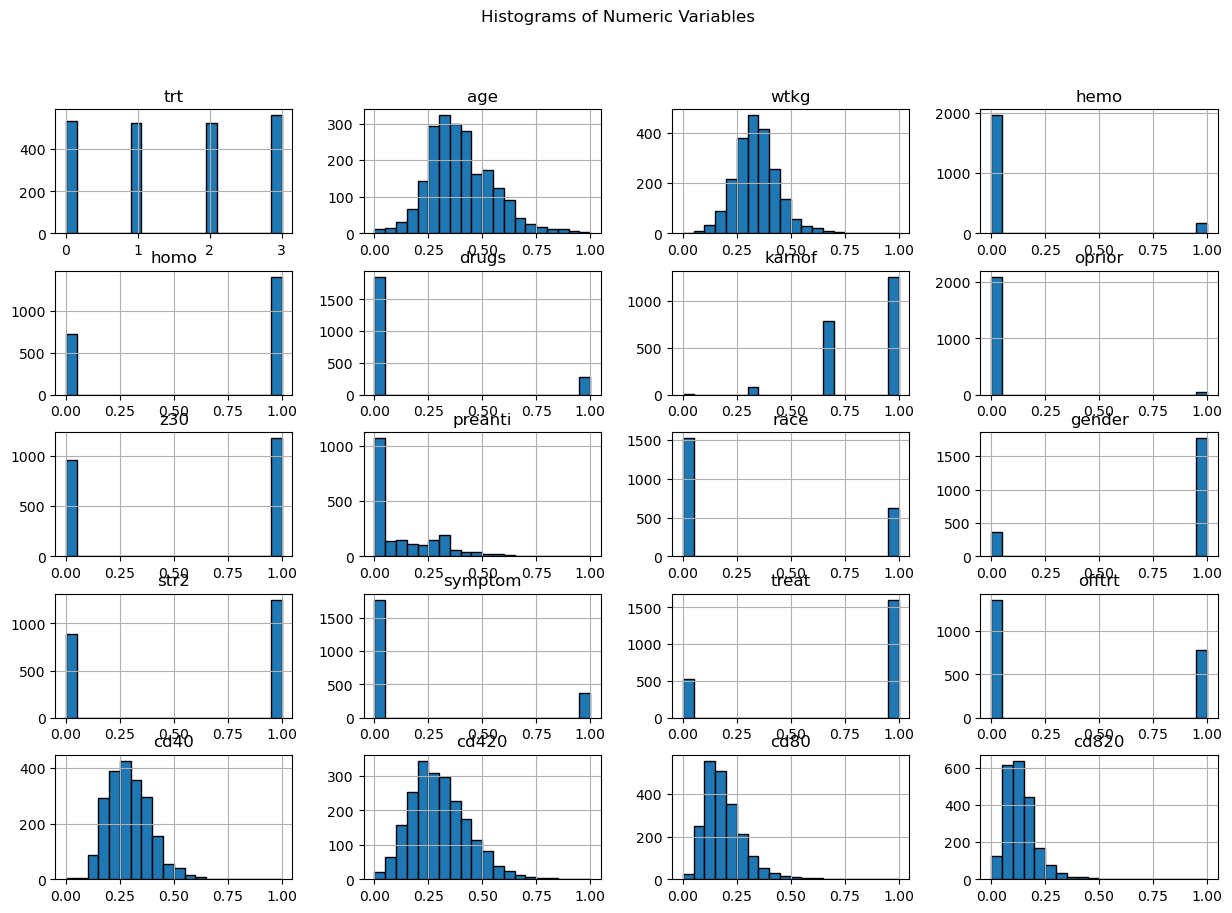

In [36]:
# Plot histograms for each numeric column
numeric_data.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Variables')
plt.show()

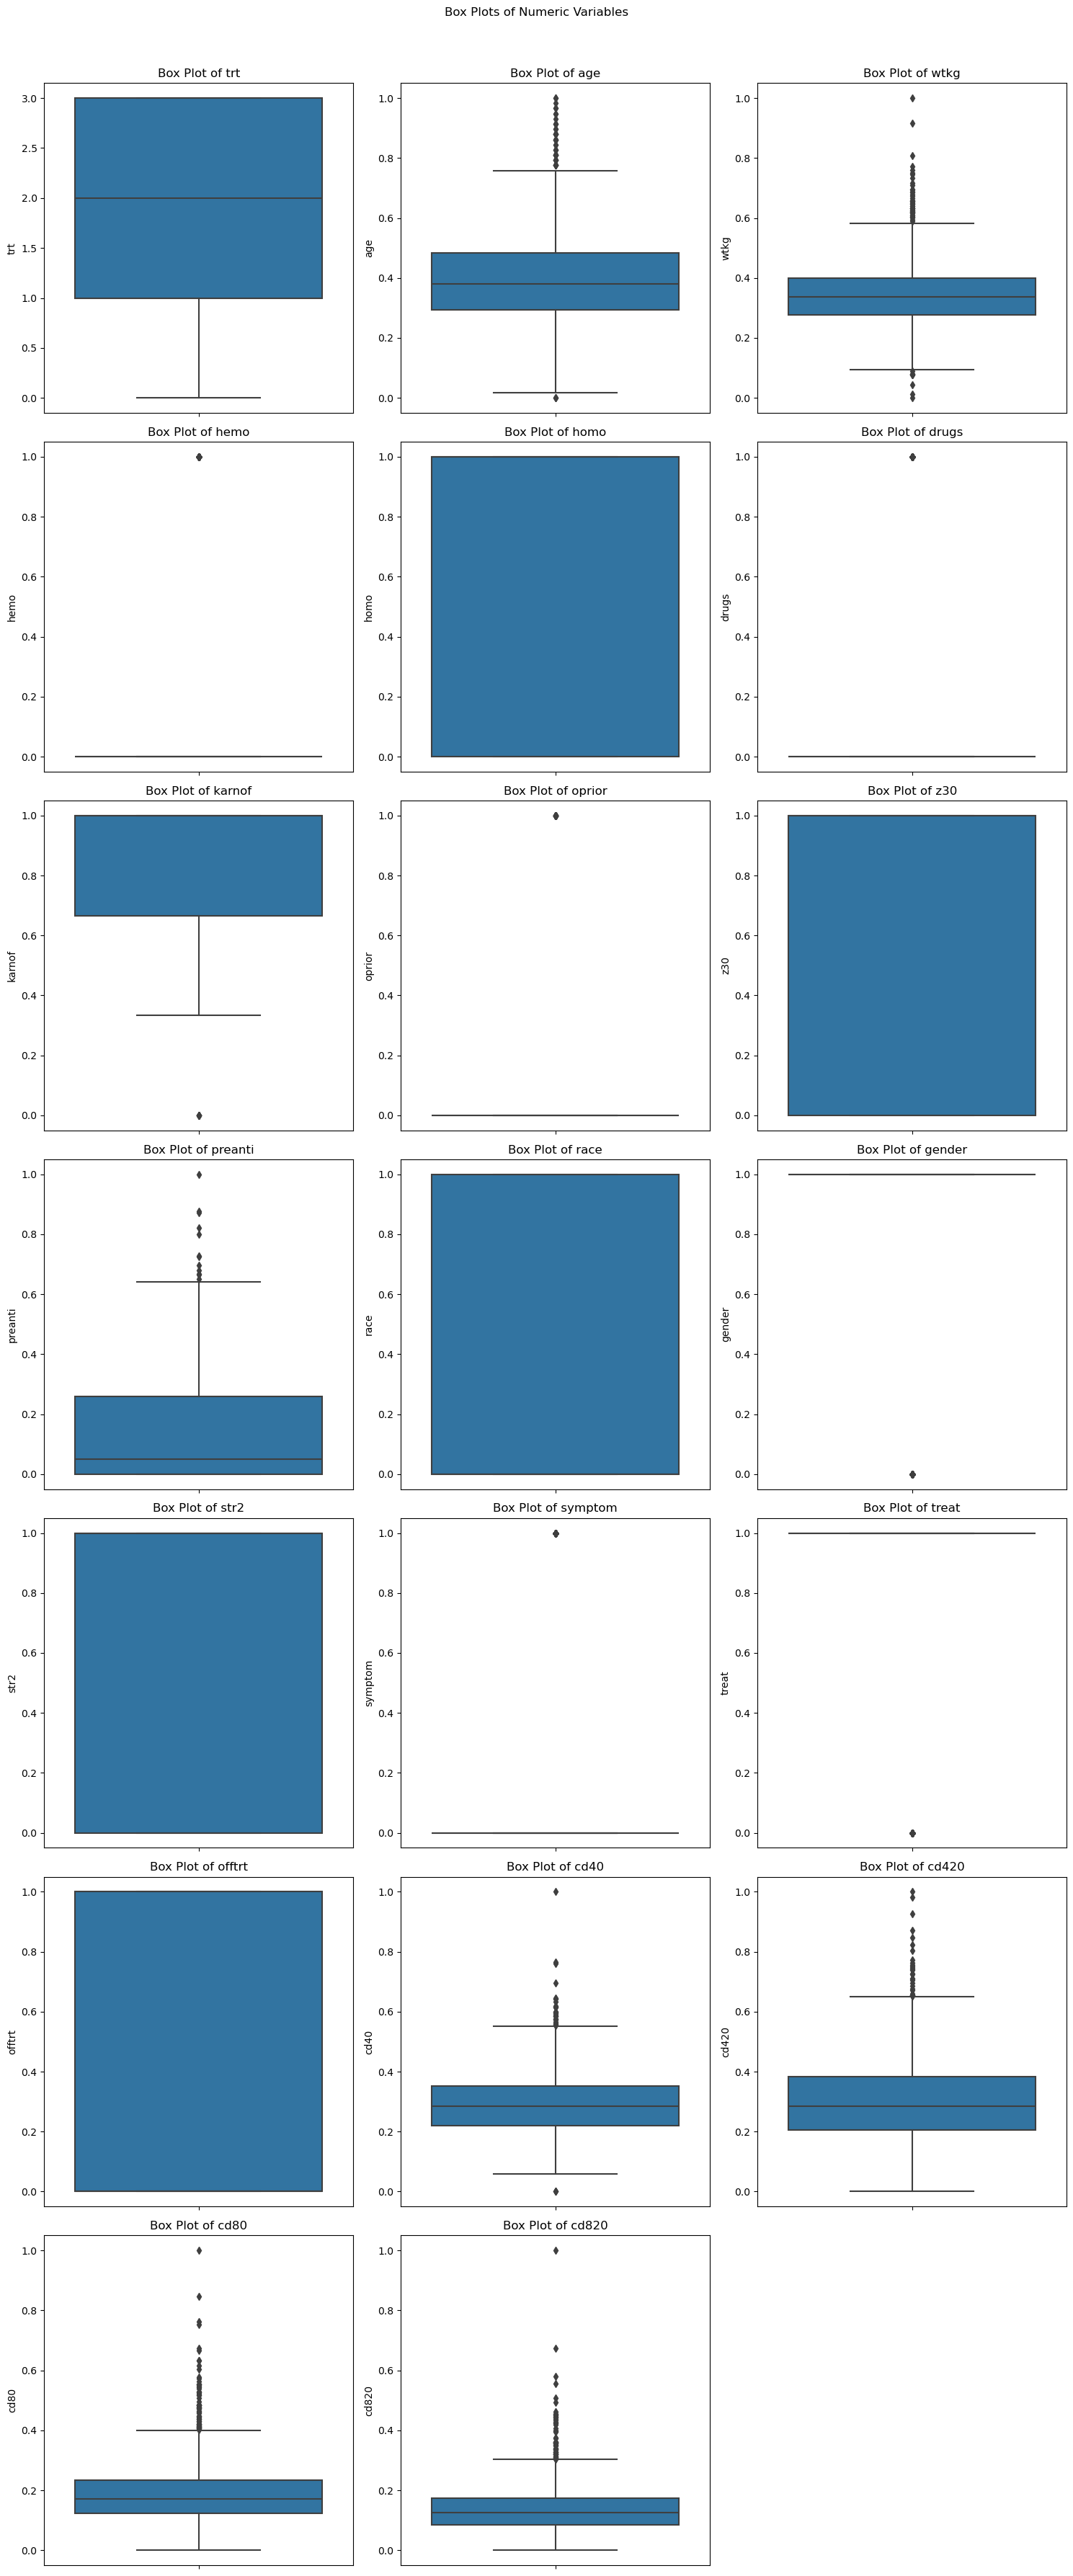

In [40]:
# Box Plots
num_columns = len(numeric_data.columns)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)

plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=numeric_data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.suptitle('Box Plots of Numeric Variables', y=1.02)
plt.show()

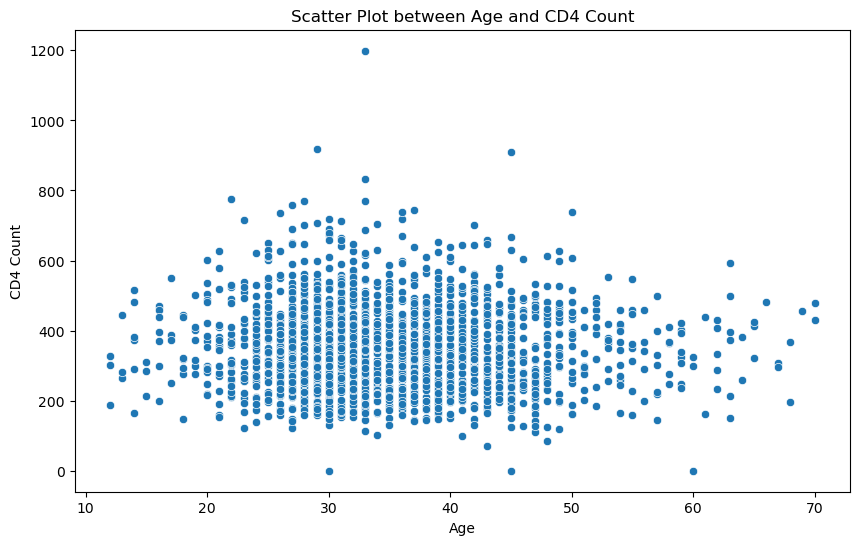

In [39]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='cd40', data=data)
plt.title('Scatter Plot between Age and CD4 Count')
plt.xlabel('Age')
plt.ylabel('CD4 Count')
plt.show()

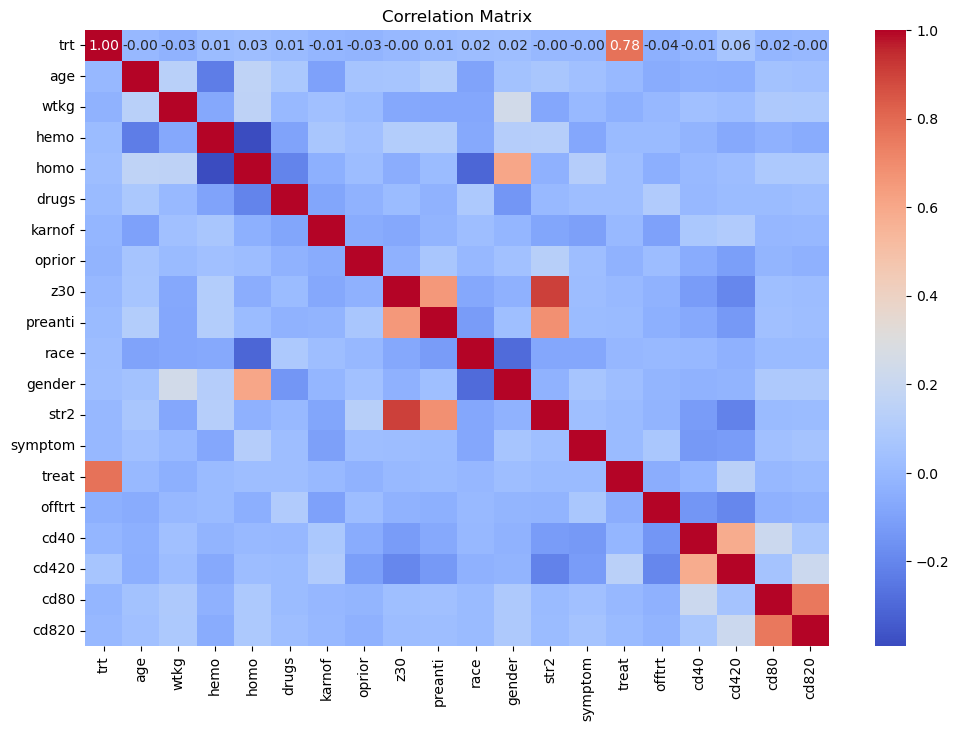

In [41]:
# Correlation Matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

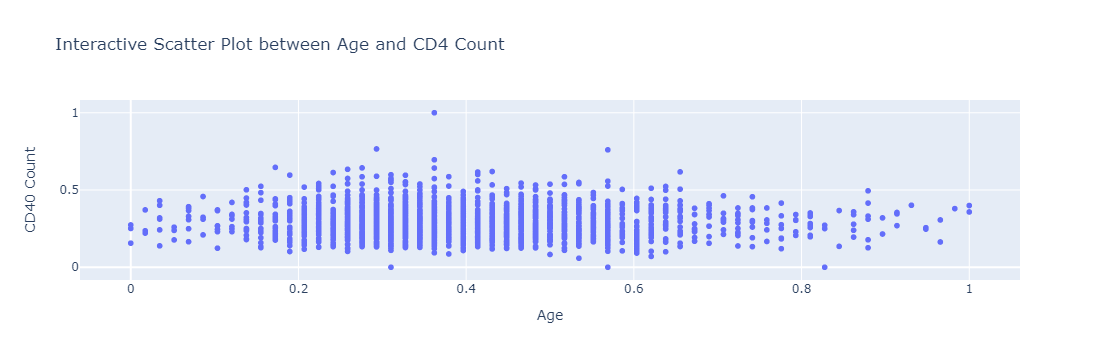

In [54]:
# Interactive Scatter Plot with Plotly
fig = px.scatter(df_cleaned, x='age', y='cd40', title='Interactive Scatter Plot between Age and CD4 Count', labels={'age': 'Age', 'cd40': 'CD40 Count'})
fig.show()


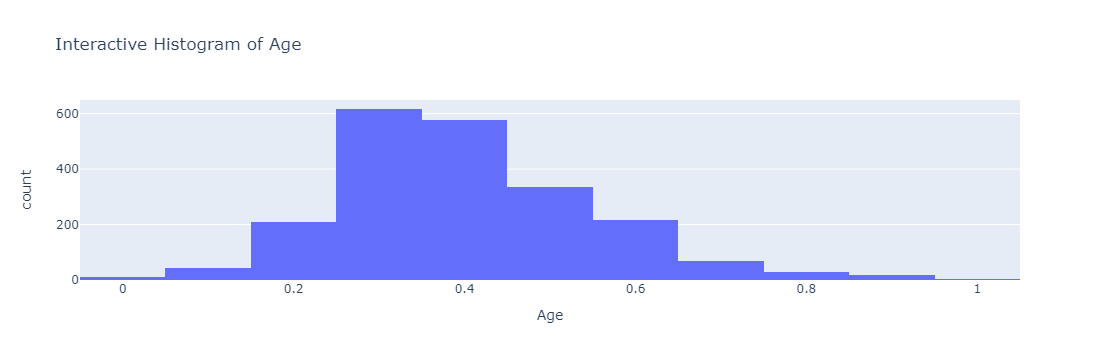

In [53]:
# Interactive Histogram for Age with Plotly
fig = px.histogram(df_cleaned, x='age', nbins=20, title='Interactive Histogram of Age', labels={'age': 'Age'})
fig.show()

In [52]:
# Assuming 'trt' column represents the treatment group
treatment_groups = df_cleaned['trt'].unique()

# Perform t-test between each pair of treatment groups
results = {}
for i in range(len(treatment_groups)):
    for j in range(i+1, len(treatment_groups)):
        group1 = df_cleaned[df_cleaned['trt'] == treatment_groups[i]]['cd40']
        group2 = df_cleaned[df_cleaned['trt'] == treatment_groups[j]]['cd40']
        t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit')
        results[f'{treatment_groups[i]} vs {treatment_groups[j]}'] = (t_stat, p_val)

print("t-test results for CD40 counts between treatment groups:")
for comparison, result in results.items():
    print(f'{comparison}: t-statistic = {result[0]:.3f}, p-value = {result[1]:.3f}')

t-test results for CD40 counts between treatment groups:
2 vs 3: t-statistic = 0.760, p-value = 0.447
2 vs 0: t-statistic = -0.061, p-value = 0.951
2 vs 1: t-statistic = 0.532, p-value = 0.595
3 vs 0: t-statistic = -0.830, p-value = 0.407
3 vs 1: t-statistic = -0.169, p-value = 0.866
0 vs 1: t-statistic = 0.594, p-value = 0.552


In [60]:
# Categorizing Karnofsky scores
data['karnof_category'] = pd.cut(data['karnof'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])

# Assuming the correct column for survival status is 'survival_status'
# Create a contingency table
contingency_table = pd.crosstab(data['symptom'], data['karnof_category'])

# Perform Chi-Square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

print("Chi-Square Test results for Symptom and Karnofsky Score Category:")
print(f'Chi-Square statistic = {chi2_stat:.3f}, p-value = {p_val:.3f}')

Chi-Square Test results for Symptom and Karnofsky Score Category:
Chi-Square statistic = 10.106, p-value = 0.001


In [ ]:
columns_to_drop = ['age_group']  # Replace with actual column names

# Drop the specified columns
df_cleaned.drop(columns=columns_to_drop,inplace=True)

In [90]:
X=df_cleaned.iloc[:,:-1]
print("Features: ")
print(X)
y=data.iloc[:,-2]
print(y)

Features: 
      trt       age      wtkg  hemo  homo  drugs    karnof  oprior  z30  \
0       2  0.620690  0.456128     0     0      0  1.000000       0  0.0   
1       3  0.844828  0.143032     0     0      0  0.666667       0  1.0   
2       3  0.568966  0.445574     0     1      1  0.666667       0  1.0   
3       3  0.603448  0.420948     0     1      0  1.000000       0  1.0   
4       0  0.534483  0.276713     0     1      0  1.000000       0  1.0   
...   ...       ...       ...   ...   ...    ...       ...     ...  ...   
2134    3  0.155172  0.172934     1     0      0  1.000000       0  1.0   
2135    0  0.086207  0.558148     1     0      0  1.000000       0  1.0   
2136    2  0.706897  0.301339     1     1      0  0.666667       0  1.0   
2137    0  0.034483  0.224912     1     0      0  1.000000       0  0.0   
2138    3  0.568966  0.359084     1     0      0  1.000000       0  0.0   

       preanti  race  gender  str2  symptom  treat  offtrt      cd40  \
0     0.000000  

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7616822429906542
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       327
           1       0.49      0.19      0.27       101

    accuracy                           0.76       428
   macro avg       0.64      0.56      0.56       428
weighted avg       0.72      0.76      0.72       428

Confusion Matrix:
 [[307  20]
 [ 82  19]]


In [101]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classifier Accuracy: 0.7686915887850467
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       327
           1       0.52      0.24      0.33       101

    accuracy                           0.77       428
   macro avg       0.66      0.59      0.59       428
weighted avg       0.73      0.77      0.73       428

Confusion Matrix:
 [[305  22]
 [ 77  24]]


In [102]:

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7616822429906542
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86       327
           1       0.49      0.22      0.30       101

    accuracy                           0.76       428
   macro avg       0.64      0.57      0.58       428
weighted avg       0.72      0.76      0.73       428

Confusion Matrix:
 [[304  23]
 [ 79  22]]
